# 假设检验


摘要

本文主要介绍了假设检验的本质思想原理、基本概念、基本步骤，以及针对一元数值型数据假设检验的一些常用方法。
包括正态性检验、均值检验、方差检验。具体详细分类如下所示：

<img src="./images/总框架.png">

# 0. 漫谈假设检验

假设检验是统计分析中重要的一环，它贯穿着统计分析的所有环节。

在数学建模中，我们既能通过假设检验对数据进行探索性的信息挖掘，以给予我们选择模型充分且客观的依据；又能在建模完成后，通过特定的假设检验验证模型的有效性。因此，储备基本的假设检验知识，学会根据数据特点、任务需求选择相对应的假设检验十分重要。

不同于回归分析等这类成体系、结构性强的统计分析任务，假设检验是一个极其分散且不成体系的任务，每一个领域都有其可使用的假设检验。例如，回归分析中有模型系数的显著性检验，时间序列分析中有单位根检验、白噪声检验等等。

假设检验主要分为两类：基于统计模型的假设检验与不基于统计模型的假设检验。

基于统计模型的假设检验典型：线性回归模型的系数显著性检验。

不基于统计模型的假设检验：直接检验数据的某些性质，比如正态性检验、双样本t检验、方差分析。

而本次课程的学习对象正是这种不基于统计模型的假设检验。常见的不基于统计模型的假设检验，并教会大家在何种情形下使用何种假设检验。

# 1. 认识假设检验

## 1.1 假设检验的原理

### 1.1.1 假设检验的本质

为了便于大家理解，我们用一个例子开始对这个话题的讨论。

**· Example.1** 必胜中学初三年级在三天前开展了一次数学考试，校长给级长下达了命令：全级均分必须不低于110，否则就要扣级长工资。今天考试成绩出来了，但是由于年级人数太多，完成全级考试情况的统计还需要两天的时间。急性子的级长很想早点知道这次考试的情况，万幸的是一班已经完成了成绩统计，**级长便想以一班的成绩，推测出全级的考试情况**。已知：一班的成绩均值$\bar{x}=108.2$，样本标准差$s=4$，人数$n=25$，且根据以往的经验，年级的考试成绩呈现正态分布。那么，级长可以认为年级均分不低于110吗？

现在简单分析一下问题。我们将整个年级的数学成绩作为一个总体，在这个前提下，可以将一班的数学成绩视作在这个总体中抽取出的一个样本。级长想知道的是一班这个样本的均值是否达到110吗？显然不是，因为样本均值$\bar{x}=108.2$是已知的；级长想知道的是，能否通过一班这个样本推测出年级这一**总体**的均值**是否**达到110。

换言之，我们需要对“年级总体均分不低于110”这样的命题做出“是”或“否”的回答，这类问题就被称之为假设检验问题。对假设检验问题进行数理上的检验并给予回答，这个过程就是假设检验。

总结

***这种根据样本信息与已知信息，对一个描述总体性质的命题进行“是或否”的检验与回答，就是假设检验的本质。假设检验验证的不是样本本身的性质，而是样本所在总体的性质***

***假设检验大体上可分为两种：参数假设检验与非参数假设检验***
- 若假设是关于总体的一个参数或者参数的集合，则该假设检验就是参数假设检验(关于总体均值的参数检验)。

- 若假设不能用一个参数集合来表示，则该假设检验就是非参数假设检验(正态性检验)

### 1.1.2 假设检验的推导

**· 假设的建立**

我们用数学语言描述example.1：

必胜中学初三年级学生的数学成绩$X$服从正态分布$X\sim N\left( \mu ,\sigma ^2 \right) $，抽取一班学生成绩做样本，已知样本均值$\bar{x}=108.2$，样本标准差$s=4$，一班人数$n=25$，能否认为总体均值$\mu > 110$？

命题“总体均值$\mu > 110$”是否正确涉及如下两个假设问题：
$$
H_0:\mu \leqslant 110\leftrightarrow H_1:\mu >110\,
$$
***$H_0$被称为原假设，$H_1$被称为备择假设，两个假设必须为互斥关系，因为只有这样，拒绝假设$H_0$才等价于接受假设$H_1$，命题成立的探讨就转化为了拒绝原假设$H_0$的探讨。***

注意到，在前面的解释中我特别强调了对**拒绝原假设**的探讨，而不是把注意力放在接受备择假设上，这是因为在数学上我们不能通过一个特殊的样本证明一个假设成立，但是却可以用其推翻（拒绝）一个命题。因此，假设检验本质上就是在探讨如何通过拒绝原假设$H_0$来接受备择假设$H_1$。

回到Example.1，我们很难直接证明命题$\mu > 110$是成立的，但是却可以通过证明假设$\mu \leqslant 110$错误，间接地验证$\mu > 110$的成立。

***在实际的假设检验中，通常将想要验证的命题作为备择假设$H_1$，通过检验原假设$H_0$是否被拒绝来判断是否接受$H_1$***


**· 单参数检验的三种类型**

原假设的注意事项：

尽管我们通常将想要验证的命题作为备择假设$H_1$，但这并不是一个“准则”——有一些假设检验的原/备择假设的设置是固定的

如在检验某个样本所在的总体是否服从某个特定的分布时（如正态性检验），我们通常会如下设置两个假设
$$
H_0:\text{样本所在总体服从某分布}\leftrightarrow H_1:\,\text{样本所在总体不服从某分布}
$$
又例如，在最常见的单参数检验中，“=”只会出现在原假设$H_0$中，而不会出现在备择假设$H_1$中。

最常见的三种单参数检验问题（均值检验）：
$$
H_0:\mu \leqslant \mu _0\leftrightarrow H_1:\mu >\mu _0
\\
H_0:\mu \geqslant \mu _0\leftrightarrow H_1:\mu <\mu _0
\\
H_0:\mu =\mu _0\leftrightarrow H_1:\mu \ne \mu _0\,
$$
其中，前面两种检验被称为单边检验，第三种检验为双边检验。事实上，以上三个问题的原假设还有另一种更常见的表达方式(简化版)：
$$
H_0:\mu = \mu _0\leftrightarrow H_1:\mu >\mu _0
\\
H_0:\mu = \mu _0\leftrightarrow H_1:\mu <\mu _0
\\
H_0:\mu =\mu _0\leftrightarrow H_1:\mu \ne \mu _0\,
$$
有同学可能会疑问了，为什么原假设全都设置为“=”号呢？其实理由很简单，我们以第一个检验问题为例：如果我们接受了$H_1$，意味着$\mu$因为显著地大于$\mu_0$而拒绝等于$\mu_0$的假设，而如果连等于$\mu_0$的假设都接受不了，小于$\mu_0$就更不用提了。因此，尽管这种写法两者并不互斥，但其在结果上与前面的写法是等效的。在往后的参数检验中，我们将统一将原假设的符号设置为“=”，区分不同检验问题只需看备择假设$H_1$即可！




**· 临界值、拒绝域、显著性水平**

拒绝原假设的规则是：

在Example.1中，在概率论与数理统计中我们知道，样本均值$\bar{x}$是总体均值$\mu$的无偏估计，那么如果拒绝原假设，即实际有$\mu > 110$，那么$\bar{x}$有很大可能性大于110，这意味着如果**实际样本**计算出来的$\bar{x}$远远大于110，那么原假设**有很大可能不成立**。为了给出一个拒绝原假设的标准，**我们设立一个临界值$C$**，若实际样本计算出来的$\bar{x}$满足$\bar{x}-110>C$，我们就拒绝原假设。

其中，$\bar{x}-110>C$也叫拒绝域，它可以被写成：

$$
\left\{ \bar{x}\,\,: \bar{x}>110+C \right\} 
$$
***一旦样本计算的结果落入拒绝域，我们就拒绝原假设；否则，则不能拒绝原假设。不同假设检验的拒绝域不尽相同，但核心的逻辑是完全相同的。***

接下来的问题是，我们如何确定临界值$C$呢？用概率去确定。

由于抽样具有随机性，因此凭借样本的信息去判断总体的性质总是会有犯错的概率——即不论我们是否拒绝原假设$H_0$，我们都**有概率**犯以下两类错误的其中一种：

***第一类错误：原假设$H_0$为真，但是数据却落入了拒绝域（因此做出拒绝$H_0$的判断)。犯第一类错误的概率被称为拒真概率$\alpha$***

***第二类错误：原假设$H_0$为假，但是数据却没有落入拒绝域（因此做出接受$H_0$的判断)。犯第二类错误的概率被称为受伪概率$\beta$***

两种犯错概率相互对立，彼此矛盾。在样本量给定的条件下，如果我们想通过对假设检验规则的调整以降低某一类错误概率，必然会导致另一类错误概率的上升。这意味着我们不可能控制它们使其同时保持在一个较低的水准，基于此，我们只能采取折中方案——通常的做法是只限制犯第一类错误的概率$\alpha$。

***在定夺临界值的时候，我们要保证发生第一类错误的概率$\alpha$需要在一个给定的、较小的水平(通常取$\alpha=0.05/0.1$)，此时$\alpha$又被称为显著性水平。***

确定临界值$C$的标准是：原假设$H_0$为真，但是数据却落入拒绝域的概率应当恰好为给定的$\alpha$。在Example.1中，这个概率可以写为：
$$
P_{H_0\,\,is\,\,true}\left( \bar{x}-\mu _0>C \right) =P\left( \bar{x}-110>C \right) =\alpha 
$$

**· 用分布处理概率构造检验统计量**

当然，拒绝域还可以直接用检验统计量与对应的分布分位点表示
$$
t>t_{n-1}\left( 1-\alpha \right) 
$$
这样更方便，也更普适，因为不用再花时间计算临界值$C$。三种假设检验的拒绝域（以正态分布为例）如下图所示
<img src="./images/拒绝域.png">

可以看到，三种假设的分位点分别对应右侧分位点、左侧分位点、双侧分位点。在实际应用中我们便可以根据备择假设$H_1$的符号，选择对应分位点构造拒绝域。

**· p值**

采用拒绝域的方法进行假设检验有一个缺点：就是分位点值与显著性水平$\alpha$是相关的。如果我们要在不同的显著水平下检验，就需要计算不同的分位点再比较，这样很繁琐。有没有一种方法，只要**样本信息**与**假设**确定下来，就可以凭借一个不变的指标来判断是否拒绝原假设呢？有的！它就是p值。

***p值是在确定的样本观测值下，给出的能拒绝原假设的最小显著性水平，它只与样本观测值和我们做的假设检验有关***。p值越小越可以拒绝原假设，例如：如果p值为0.001，比0.01的置信水平还要小，我们认为在0.01的置信水平下我们也可以拒绝原假设；而如果p值为0.025，比0.01的置信水平要大，但小于0.05，则我们认为在0.05的置信水平下我们可以拒绝原假设，但在0.01置信水平下不可以拒绝。

p值的形式与我们做的备择假设$H_1$有关：

· 若$H_{1}$的符号为$\ne $，则：$pvalue=P\left( \left| X \right|>\left| Test\,\,statistics \right| \right) $

· 若$H_{1}$的符号为>，则：$pvalue=P\left( X>Test\,\,statistics \right) $

· 若$H_{1}$的符号为<，则：$pvalue=P\left( X<Test\,\,statistics \right) $

其中，X为服从某个特定分布的变量，Test statistics为前面提到的检验统计量。可以看到，p值本质上是一种累积概率，对于符号为>的备择假设，p值则是右侧累积概率；对于符号为<的备择假设，p值则是左侧累积概率；而对于相同的检验统计量Test statistics而言，双边检验的p值为某类单边检验的两倍。

使用p值进行假设检验在实际应用中更常见，python中进行假设检验的所有包都会输出检验统计量与p值，因此在后续的学习当中，我们统一使用p值进行假设检验。

In [1]:
# 利用example.1的数据进行三种假设检验
import numpy as np
import pandas as pd
from scipy.stats import t

n = 25
x_bar = 108.2
s = 4
mu = 110

# 计算检验统计量
tvalue = (x_bar-mu)/s
# print('t值为：{}'.format(tvalue))
# 利用p值进行假设检验
'''
sf:右尾累积概率
cdf:左尾累积概率
'''
# 若备择假设为mu>110 由于备择假设是大于号，因此应当选用单侧右尾累积概率，tvalue为检验统计量，n-1为自由度
pvalue = t.sf(tvalue, n-1)
print('备择假设为mu>110的p值为：{}'.format(pvalue))

# 若备择假设为mu<110
pvalue = t.cdf(tvalue, n-1)
print('备择假设为mu<110的p值为：{}'.format(pvalue))

# 若备择假设为mu不等于110
pvalue = t.cdf(tvalue, n-1)*2  # 之所以是左尾累积概率的两倍，是因为右尾累积概率大于0.5，而p值不可能大于1。
print('备择假设为mu不等于110的p值为：{}'.format(pvalue))


备择假设为mu>110的p值为：0.6716255918454657
备择假设为mu<110的p值为：0.32837440815453434
备择假设为mu不等于110的p值为：0.6567488163090687


### 1.1.3 假设检验的基本步骤

尽管python的scipy.stats模块含有很多可直接使用的各类假设检验api，但是相比于专门进行统计分析的SPSS与R，python的假设检验功能相对较少。

在这里，我们总结一下基于p值的假设检验基本步骤，在后续的假设检验实操中，我们将基本按照这套“方法论”进行操作。

1. 确定备择假设$H_1$，备择假设的符号决定了我们使用何种累积概率。
2. 明确检验统计量Test statistics的公式，不同假设检验都有其确定的检验统计量，查阅资料找到它！
3. 明确检验统计量所服从的分布，这样我们才能计算累积概率。
4. 根据备择假设$H_1$与检验统计量Test statistics计算p值。
5. 将p值与显著性水平$\alpha$比较，若$p>\alpha$，则不能拒绝原假设；若$p<\alpha$，则可以拒绝原假设。

## 1.2 假设检验的分类

将常见的假设检验，按照数据类型、数据特征进行分类，在实际应用中可以直接根据待分析数据的特征以及分析任务选择相应的假设检验。对于一些较为常见且重要的假设检验（如各种t检验），我们将简要学习其原理；对于不常见且原理解释较为困难的检验（如正态性检验），我们只需要学习如何使用即可。


In [3]:
# 加载必要的包
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from IPython.display import display

# 数值型数据

数值型数据是生活中最常见的数据类型，一个班级中每个人的考试成绩，股市中每一支股票的价格等，这些都是非常常见的数值型数据。当我们想研究某单个变量的性质时，所使用的数据便是一元数值数据；而如果想同时研究多个变量，所使用的数据便是多元数值数据。

# 2. 一元数值数据的假设检验

本章节覆盖了一元数值数据中的**组间均值**假设检验的内容，我们主要学习如何通过样本数据对其所在总体的**均值**的性质进行检验，并展示如何在python中实现每个检验。主要内容有：

1. 正态性检验
2. 比较一组数据的总体均值与一个固定值是否相等的检验
3. 比较两组数据的总体均值之间是否相等的检验
4. 比较两组以上的多组数据的总体均值之间是否相等的检验

在2~4的检验中，又可以分为两种情况。如果数据大致符合正态分布，那么可以使用参数检验-t检验，它比非参数检验更灵敏，但需要满足正态假设；如果数据不是正态分布的，那么可以使用一些非参数检验。

## 2.1 正态性检验

由于参数检验比非参数检验更灵敏，因此一旦数据是正态分布的，我们应该使用参数检验，此时对数据进行正态性检验就非常有必要了。

***判断数据的正态性的三种方法：可视化判断-正态分布概率图；Shapiro-Wilk检验；D'Agostino's K-squared检验***

### 2.1.1 概率图

在统计学中，有许多工具用于视觉评估分布，概率图就是其中之一。

概率图的逻辑非常简单。对于一个给定的样本数据集，概率图会先将数据$x$进行从小到大的排序，并计算排序后数据$x$对应的分布分位数；随后，以分位数为横轴，以有序样本值为纵轴，将数据点绘制在一个二维图中。

***如果数据大致服从目标分布，数据点会近似地沿着线$y=x$分布，如果数据不服从目标分布，数据点偏离线$y=x$分布***

接下来我们使用python演示一波。

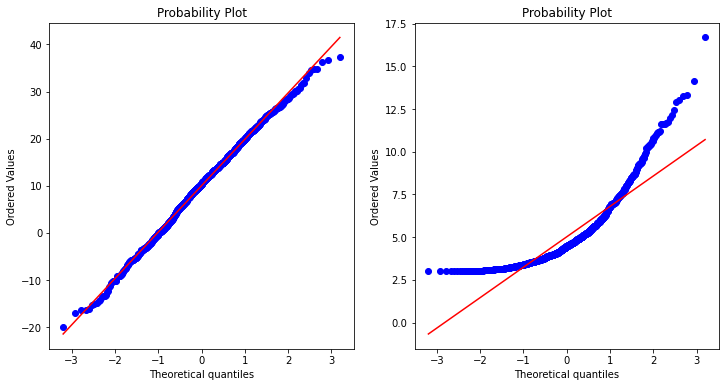

In [4]:
# 生成1000个服从正态分布的数据
# rvs(loc,scale,size):生成服从指定分布的随机数，loc：期望；scale：标准差；size：数据个数
data_norm = stats.norm.rvs(loc=10, scale=10, size=1000)
# 生成1000个服从卡方分布的数据
data_chi = stats.chi2.rvs(2, 3, size=1000)

# 画出两个概率图
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1)
plot1 = stats.probplot(data_norm, plot=ax1)  # 正态数据
ax2 = fig.add_subplot(1, 2, 2)
plot2 = stats.probplot(data_chi, plot=ax2)  # 卡方分布数据


可以看到，正态性数据在正态分布概率图中十分接近直线$y=x$，而卡方分布数据则几乎完全偏离了该直线。可见，概率图可视化确实可以起到初步判断数据正态性的作用。

### 2.1.2 两种正态性检验

概率图只能粗略地判断数据是否具有正态性，但这并不精准。为了较为准确地判断样本所在总体是否为正态分布，我们需要进行严格的正态性检验。

正态性检验的两个假设如下：
$$
H_0:\text{样本所在总体服从正态分布}\leftrightarrow H_1:\,\text{样本所在总体不服从正态分布}
$$
正态性检验的种类非常多，在这里我只列举两种最常用、最强大的假设检验

***小样本下使用Shapiro-Wilk检验；大样本下使用D'Agostino's K-squared检验***

**· Shapiro-Wilk检验——小样本正态性检验**

Shapiro–Wilk test是正态性检验最为有效的方法之一，是一种在频率统计中检验正态性的方法，其理论原理较为复杂，在这里不作过多介绍。

该方法适用小样本的正态性检验问题，这是因为：**该检验在每一个样本值都是唯一时的检验效果最好**，而一旦样本过多，难免会存在几个样本值重复的情况，这会使该方法的效用大打折扣。

***样本量适用范围（50-2000）：样本量不得小于8，小于50最佳，小于2000效果较好，超过5000后不再适用。***

**· D'Agostino's K-squared test——大样本正态性检验**

D'Agostino's K-squared test主要通过计算偏度（Skewness）和峰度（Kurtosis）来量化数据分布曲线与标准正态分布曲线之间的差异与不对称性，然后计算这些值与正态分布期望值的之间的不同程度。

该方法是一种常用且强大的正态性检验方法，适用于大样本情况。这是因为分布曲线的偏度和峰度容易受到数据量的影响，数据量越大，偏度与峰度的计算就越准确。

***样本量适用范围（越大越好）：样本量不得小于4，除此以外越大越好。***

### 2.1.3 同时使用多种方法判断正态性

实际应用中，由于数据的复杂性，仅使用一种方法判断正态性有可能产生一定的误差，因此我们通常同时使用多种方法进行判断。如果不同方法得出的结论不同，此时就需要仔细观察数据的特征，寻找结果不一致的原因。如：若Shapiro-Wilk test显著（非正态），D'Agostino's K-squared test不显著（正态），则有可能是因为样本量较大，或者样本中存在重复值现象，如果事实确实如此，那么我们就应该采纳D'Agostino's K-squared test的结论而非Shapiro-Wilk test的结论。

接下来，我们在python中定义一个函数，将概率图、Shapiro-Wilk test、D'Agostino's K-squared test结合在一起。

In [5]:
data_small = stats.norm.rvs(0, 1, size=30)  # 小样本正态性数据集
data_large = stats.norm.rvs(0, 1, size=6000)  # 大样本正态性数据集

In [6]:
# 定义一个正态性检验函数，它可以输出：
## 正态概率图
## 小样本Shapiro-Wilk检验的p值
## 大样本D'Agostino's K-squared检验的p值

from statsmodels.stats.diagnostic import lilliefors
from typing import List


def check_normality(data: np.ndarray, show_flag: bool = True) -> List[float]:
    """
    输入参数
    ----------
    data : numpy数组或者pandas.Series
    show_flag : 是否显示概率图
    Returns
    -------
    两种检验的p值；概率图
    """

    if show_flag:
        _ = stats.probplot(data, plot=plt)
        plt.show()

    pVals = pd.Series(dtype='float64')
    # D'Agostino's K-squared test
    _, pVals['Omnibus'] = stats.normaltest(data)

    # Shapiro-Wilk test
    _, pVals['Shapiro-Wilk'] = stats.shapiro(data)

    print(f'数据量为{len(data)}的数据集正态性假设检验的结果 :\n')
    print(pVals)


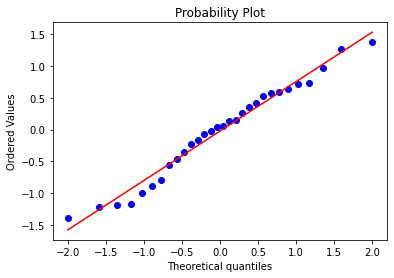

数据量为30的数据集正态性假设检验的结果 :

Omnibus         0.517302
Shapiro-Wilk    0.505802
dtype: float64


In [7]:
check_normality(data_small, show_flag=True)

In [8]:
check_normality(data_large, show_flag=False)  # 当样本量大于5000，会出现警告

数据量为6000的数据集正态性假设检验的结果 :

Omnibus         0.000580
Shapiro-Wilk    0.015222
dtype: float64


/Users/taylor/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## 2.2 均值检验

### 2.2.1 单组样本的均值相等性检验

**· 应用场景**

***单组样本均值假定的检验：检验一个样本所在总体的均值是否和一个参考值相等。***

**Example.2** 必胜中学里，陈老师班结束了一次英语考试。由于班级人数较多，短时间内很难完成批改与统计，王老师又很想知道此次班级平均分与级长定的班级均分137的目标是否有显著区别，于是他随机抽取了已经改好的10名同学的英语成绩：

136,136,134,136,131,133,142,145,137,140

问：王老师可以认为此次班级平均分与级长定的班级均分137的目标没有显著区别吗？

很明显，这就是一个典型的单组样本均值假定的检验，比较的是这个样本（10个同学的英语成绩）所代表的总体均值（班级英语成绩均值）是否与参考值137相等。那么对于这类问题，我们可以使用单样本t检验。

**· 单样本t检验(One Sample t-test)**

t检验要求总体服从正态分布，即有
$$
x\sim N\left( \mu ,\sigma ^2 \right) 
$$
在Example.2中，这意味着要求王老师班级中每一位同学的英语成绩都服从正态分布。在t检验中，总体的标准差$\sigma$是不需要事先知道的，这与概率论与数理统计中的z检验不一样，因此t检验在实际应用中更广泛。

接下来，我们介绍一下使用p值进行假设检验的基本流程。

单样本t检验的两个假设为：
$$
H_0:\mu =\mu_0\leftrightarrow H_1:\mu \ne \mu_0\,
$$
对应的检验统计量为：
$$
Test\,\,statistics=\frac{\bar{x}-\mu _0}{s}
$$
检验统计量服从的分布为：
$$
Test\,\,statistics\sim t_{n-1}
$$
其中，$n$为样本量。我们可以根据以上信息计算p值，当然，python中有可以直接使用的api，我们将在后面介绍。

In [9]:
data = np.array([136, 136, 134, 136, 131, 133, 142, 145, 137, 140])
print(data, '\n均值为：', data.mean())

[136 136 134 136 131 133 142 145 137 140] 
均值为： 137.0


In [10]:
# 定义一个单组样本均值检验函数，使它可以输出t检验的p值
from pprint import pp, pprint


def check_mean(data, check_value, confidence=0.05, alternative='two-sided'):
    '''
    输入参数
    ----------
    data : ndarray或者pandas.Series
    check_value : 想要比较的均值
    confidence : 显著性水平
    alternative : 检验类型，这取决于我们备择假设的符号:two-sided为双侧检验、greater为右侧检验、less为左侧检验

    输出
    -------
    在t检验下的p值，在显著性水平下是否拒绝原假设
    '''
    p_value = pd.Series(dtype='float64')
    # 正态性数据检验-t检验
    _, p_value['t-test'] = stats.ttest_1samp(data, check_value)
    p = p_value['t-test']
    if p < confidence:
      # {0:4.2f} 0是相当于对应后面变量的索引，:理解为填充符号 4.2f表示小数点前显示4位，后显示2位
      print(('目标值{0:4.2f}在显著性水平{1:}下不等于样本均值(p={2:5.3f}).'.format(
          check_value, confidence, p)))
    else:
      print(('目标值{0:4.2f}在显著性水平{1:}下无法拒绝等于样本均值的假设.(p={2:5.3f})'.format(
          check_value, confidence, p)))


In [11]:
check_mean(data, 137)  # t检验的p值 1.000 > 0.05，我们无法拒绝原假设，王老师可以认为班级均分为137。

目标值137.00在显著性水平0.05下无法拒绝等于样本均值的假设.(p=1.000)


### 2.2.2 两组样本的均值相等性检验

在进行两组之间的均值比较之前，我们需要进行一个重要的判断：这两组样本之间是否独立呢？这个问题的答案将决定着我们使用何种类型的检验。

#### 组别间独立

为了让大家对这里的“独立”有较好的了解，我们看看下面的例子。

**Example.3** 陈老师在年级有一个竞争对手：王老师。王老师在他们班级在同一时间也举行了一次英语考试，且两个班用的是同一份卷子，因此两个班的英语成绩就具有比较的意义了。和陈老师一样，王老师也来不及批改和统计他们班级的英语成绩，不过他手头上也有12份已经改好的试卷，成绩分别为：

134,136,135,145,147,140,142,137,139,140,141,135

问：我们可以认为两个班级的均分是相等的吗？

这是一个非常典型的双独立样本的均值检验。值得注意的是，这里的独立指的是抽样意义上的独立，而不是统计意义的独立，即我们只需要保证这两个样本在选取的时候是互不影响就可以了。

抽样意义上的独立：两个样本中，一个样本中的受试不能影响另一个样本中的受试。事实上，两个样本是否在抽样意义上独立，是没有固定答案的，因为在很多情况下，我们既不能保证两个样本间完全独立，也很难判断出两者是否存在相关性。我们只能在抽样的时候使用更加科学的抽样方法，尽可能地避免样本间的相互影响。

**· 双样本t检验(Two Sample t-test)**

若两个样本的总体都服从正态分布，那么我们可以使用双样本t检验。双样本t检验有两个小分类——总体的标准差$\sigma$相等以及两种不相等，这两种情况下的检验统计量不相同，服从的t分布的自由度也不相同。

两种检验的假设问题是相同的：
$$
H_0:\mu _x=\mu _y\leftrightarrow H_1:\mu _x\ne \mu _y\,
$$
(1) 若两个样本的总体方差相等，则

检验统计量为
$$
Test\,\,statistics=\frac{\bar{x}-\bar{y}}{s_w\sqrt{\frac{1}{m}+\frac{1}{n}}}\,\,, s_w=\sqrt{\frac{1}{m+n-2}\left[ \sum_{i=1}^m{\left( x_i-\bar{x} \right) ^2+\sum_{i=1}^n{\left( y_i-\bar{y} \right) ^2}} \right]}
$$
检验统计量服从分布
$$
Test\,\,statistics\sim t_{n+m-2}
$$
其中，$m$为样本$x$的样本量，$n$为样本$y$的样本量。

(2) 若两个样本的总体方差不相等，则

检验统计量为
$$
Test\,\,statistics=\frac{\bar{x}-\bar{y}}{\sqrt{\frac{s_{x}^{2}}{m}+\frac{s_{y}^{2}}{n}}}\,
$$
检验统计量近似服从分布
$$
Test\,\,statistics\rightarrow t_l\,\,, l=\frac{\left( \frac{s_{x}^{2}}{m}+\frac{s_{y}^{2}}{n} \right) ^2}{\frac{s_{x}^{2}}{m^2\left( m-1 \right)}+\frac{s_{y}^{2}}{n^2\left( n-1 \right)}}
$$
***很难知晓总体的信息时，可以使用方差齐性检验levene检验进行判断两个总体的标准差是否相等。***


**· Mannwhitneyu秩和检验**


Mannwhitneyu秩和检验也是一种非参数检验。它的做法是，首先将两类样本混合在一起，对所有样本按照所考察的特征从小到大排序。在两类样本中分别计算所得排序序号之和$T_1$和$T_2$，我们将之称作秩和。Mannwhitneyu秩和检验的基本思想是，如果一类样本的秩和显著地比另一类小（或大），则两类样本在所考察的特征上有显著差异。

值得注意的是，秩和检验与符号秩和检验是不一样的：前者不考虑符号的问题，而后者考虑符号问题。

In [12]:
# 定义一个单组样本均值检验函数，使它可以同时输出t检验与mannwhitneyu检验的p值
def unpaired_data(group1: np.ndarray, group2: np.ndarray, confidence=0.05, alternative='two-sided'):
    """ 
    输入参数
    ----------
    group1/2 : 用于比较的两组数据
    confidence : 显著性水平
    alternative : 检验类型，这取决于我们备择假设的符号:two-sided为双侧检验、greater为右侧检验、less为左侧检验
    输出
    -------
    在两种检验下的p值
    在显著性水平下是否拒绝原假设
    """
    p_value = pd.Series(dtype='float64')

    print('先进行两组数据的方差齐性检验')
    # 先进行两组数据的方差齐性检验
    _, p_value['levene'] = stats.levene(group1, group2)

    # t检验-若数据服从正态分布
    if p_value['levene'] < confidence:
        print('在显著性水平{0:}下，两组样本的方差不相等(p={1:.4f})，因此需要使用方差不等的t检验'.format(
            confidence, p_value['levene']))
        print('------------------------------------')
        # 因为方差不相等，因此是False
        _, p_value['t-test'] = stats.ttest_ind(group1, group2, equal_var=False)
        print('t检验（数据服从正态分布）p值：{}'.format(p_value['t']))
    else:
        print('在显著性水平{0:}下，不能拒绝两组样本方差相等的假设(p={1:.4f})，因此需要使用方差相等的t检验'.format(
            confidence, p_value['levene']))
        print('------------------------------------')
        # 因为方差相等，因此是True
        _, p_value['t-test'] = stats.ttest_ind(group1, group2, equal_var=True)
        print('t检验（数据服从正态分布）p值：{:.3f}'.format(p_value['t-test']))

    # mannwhitneyu检验-数据不服从正态检验
    _, p_value['mannwhitneyu'] = stats.mannwhitneyu(group1, group2)
    print('Mann-Whitney检验（数据不服从正态检验）p值：{:.3f}'.format(p_value['mannwhitneyu']))

    # 两组样本均值的散点图可视化
    print('------------------------------------')
    print('两组样本均值的散点图可视化')
    plt.plot(group1, 'bx', label='group1')
    plt.plot(group2, 'ro', label='group2')
    plt.legend(loc=0)
    plt.show()


[136 136 134 136 131 133 142 145 137 140] 
group1均值为： 137.0
[134 136 135 145 147 140 142 137 139 140 141 135] 
group2均值为： 139.25

先进行两组数据的方差齐性检验
在显著性水平0.05下，不能拒绝两组样本方差相等的假设(p=0.8277)，因此需要使用方差相等的t检验
------------------------------------
t检验（数据服从正态分布）p值：0.221
Mann-Whitney检验（数据不服从正态检验）p值：0.260
------------------------------------
两组样本均值的散点图可视化


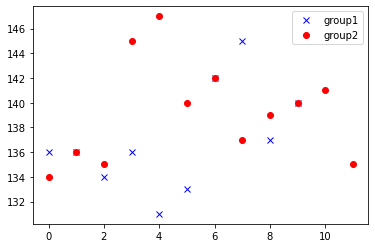

In [13]:
# 陈老师班
group1 = data
# 王老师班
group2 = np.array([134,136,135,145,147,140,142,137,139,140,141,135])
print(group1, '\ngroup1均值为：', group1.mean())
print(group2, '\ngroup2均值为：', group2.mean())
print()
unpaired_data(group1, group2)

两个检验都表明，两个班级的平均分没有显著差异。

#### 成对检验

在进行两组间均值比较的时候，有一种特殊情况——两个样本“故意”不独立。这种情况多出现两个样本分别为**同一个受试个体**不同时间的受试结果，这两个样本是“成对”的，是彼此紧密相连的。对这样两个样本进行均值比较检验，就是成对检验。

为了让大家更好地理解“成对”的概念，我们再把Example.3的故事讲长一点。

**Example.4** 得知了王老师班的考试均值与自己班的没有显著差异，陈老师非常生气：“我堂堂优秀教师，居然不能和隔壁老王拉开差距，岂有此理！”，于是陈老师开始了为期一周的魔鬼训练，并在一个星期后又进行了一次全班的测验。陈老师**依旧抽取了上次十位同学的成绩**，依次为：

139,141,137,136,135,132,141,148,145,139

问：这次班级均分与上次是否存在显著差异呢？

显然，两个样本分别为**相同的同学**前后两次的考试成绩，是非常典型的成对数据，因此我们可以使用成对检验。成对检验也分为两种：若总体服从正态分布，则使用成对t检验；若总体不服从正态分布，则使用成对wilcoxon秩和检验。

**· 成对t检验**

成对检验与独立双样本检验的假设问题是一样的
$$
H_0:\mu _x=\mu _y\leftrightarrow H_1:\mu _x\ne \mu _y\,
$$
事实上，成对t检验本质上是检验$\mu_x-\mu_y$的差值是否为0的**单样本均值t检验**，因此它的检验统计量就可以按照单样本均值t检验的检验统计量构造，只不过变量换成了$x-y$，目标值为0。

检验统计量为：
$$
Test\,\,statistics=\frac{\bar{x}-\bar{y}}{s_d}\,\,, d=x-y
$$
检验统计量服从分布：
$$
Test\,\,statistics\sim t_{n-1}
$$
其中，$n$为样本量。

In [14]:
def paired_data(group1: np.ndarray, group2: np.ndarray, confidence=0.05, alternative='two-sided'):
    """
    输入参数
    ----------
    group1/2 : 用于比较的两组数据，注意，两组数据的样本顺序必须相同
    confidence : 显著性水平
    alternative : 检验类型，这取决于我们备择假设的符号:two-sided为双侧检验、greater为右侧检验、less为左侧检验

    输出
    -------
    在两种检验下的p值
    在显著性水平下是否拒绝原假设
    """
    p_value = pd.Series(dtype='float64')

    # 配对t检验-样本服从正态分布
    _, p_value['t-test'] = stats.ttest_1samp(post - pre, 0)
    p = p_value['t-test']
    print('t-test')
    if p < confidence:
      print(('在显著性水平{0:}下，两组配对样本的均值不相等(p={1:5.3f}).'.format(confidence, p)))
    else:
      print(('在显著性水平{0:}下无法拒绝等于样本均值的假设.(p={1:5.3f})'.format(confidence, p)))


In [15]:
# 第一次测验
pre = data
# 第二次测验
post = np.array([139,141,137,136,135,132,141,148,145,139])

paired_data(pre, post)

t-test
在显著性水平0.05下，两组配对样本的均值不相等(p=0.039).


两次测验的均分在显著性水平0.05下有显著差异，根据双边检验的p值是某侧单边检验两倍的结论，我们可以推测出第二次测验的均分均值显著地高于第一次测验均分，恭喜陈老师，赢！

### 2.2.3 多组样本的均值相等性检验

我们在前面学习了单组样本以及两组样本的均值检验，接下来开始学习同时对多组样本的总体进行均值检验。这种对多个总体的均值做比较检验的统计方法，称为方差分析(Analysis of variance，ANOVA)。

在方差分析部分，我们将重点讲解单因素方差分析的原理与思想，对于多因素方差，我们只讲解如何应用。

#### 单因素方差分析

**· 认识方差分析**

方差分析就是对多个总体的均值做比较检验的统计方法。

那么，单/多因素方差分析中的因素是什么意思呢？我们看看下面三个方差分析问题的举例：

1. 四种不同【商标】的同一类型产品的（质量指标）是否一致。
2. 对同样的商品，采取三种不同的【销售方式】是否会导致显著不同的（销售量）。
3. 五个不同【居民区】的（居民购买力）是否存在显著差异。

在这些例子中，商标、销售方式、居民区这些**区分不同组别的依据**就是因素（也叫因子），通常用大写字母$A,B,C$等表示，而一个因素所处的不同的状态被称为水平，用$A_1,A_2$等表示。在这三个例子中，因素都只有一个，因此它们都是单因素方差分析；若因素有多个，则被称为多因素方差分析。

对于单因素方差分析而言，进行比较的【样本个数】，本质上就是【该因素的水平个数】。

例如，在举例1.中，我们其实比较的是四个商标不同的产品质量指标样本均值（所在总体的均值），在该例中，因素“商标”的因子水平个数为4。

方差分析的多个总体均值假设检验：
$$
H_0:\mu _1=\mu _2=\mu _i=\cdots \mu _k\leftrightarrow H_1: \mu _i\text{不全相等}
$$
其中，$k$为样本个数（因子水平个数）

简单看看总体均值不全相等的情形

<img src="./images/方差分析.png">




**· 方差分析的假设**

1. 每个样本的总体均为正态总体
2. 各总体的标准差相同
3. 从每个总体中抽取的样本相互独立

若样本满足以上条件，方差分析的结果是准确的。但是在大样本下，就算不满足假设1.与假设2.，方差分析的结果也是稳健的。

**· 方差分析的思想**

举个例子：

小红的考试均分是91，小刚的考试均分是89。我们假设一个非常极端的情况：他们的标准差都是0，即小红每次考试都是91，小刚每次考试都是89，那么我们似乎可以很容易地判断出，两个人的均分确实存在明显的差异；

如果他们的标准差都很大，高达6（方差就是36），即他们的成绩都很不稳定，这次小红考79、小刚考93，下次小红考94、小刚考70。在高达36的方差下，2分的均值差似乎没有什么说服力了。

因此，我们需要综合这两个评判指标。最简单的方法就是两者相除，即样本间均值的“差异程度”除以样本内差异程度。这就是方差分析最根本的思想。

**· 原理解析**

记$y_{ij}$为第$i$个样本的第$j$个样品，假设有r个样本，每个样本的样品数量都同为$m$，于是我们有$r\times m$个样品：
$$
y_{i j}, \quad i=1,2, \cdots, r, \quad j=1,2, \cdots, m,
$$

既然我们要研究“差异程度”，那么观察每个样本值$y_{ij}$与平均值的偏差一定是必不可少的。数据$y_{ij}$与所有数据的总平均$\bar{y}$的偏差可用$y_{ij}-\bar{y}$表示，这个总偏差可以解构为两个偏差之和：
$$
y_{ij}-\bar{y}=\left( y_{ij}-\bar{y}_{i·} \right) +\left( \bar{y}_{i·}-\bar{y} \right) 
$$
其中，$\bar{y}_{i·}$为因素$A$在第$i$个水平下的样本均值（或者就是第$i$个样本的均值）。

$y_{ij}-\bar{y}_{i·}$被称为**组内偏差**，它反映了第$i$个样本的组内数据与组内平均值的随机误差；

$\bar{y}_{i·}-\bar{y}$被称为**组间偏差**，除了反映随机误差外，它还反映了第$i$个的**总体**均值与**全总体均值**的差值，它可以理解为因素$A$的第$i$个水平带来的**主效应**。

我们思考一下可以发现，以上两种偏差是不是分别对应了我们前面所提到的样本内差异程度与样本间均值的差异程度呢？答案是肯定的。我们继续往下看。

我们完成了对一个样本值与平均值偏差的解构，接下来就要将所有的偏差汇总起来，计算总的“差异程度”。

各$y_{ij}$间总的差异大小可以用**总偏差平方和**$S_T$表示（思考一下为什么是平方和，而不是直接相加呢？）
$$
S_{T}=\sum_{i=1}^{r} \sum_{j=1}^{m}\left(y_{i j}-\bar{y}\right)^{2}, \quad f_{T}=n-1,
$$
仅由随机误差引起的数据间差异可用**组内偏差平方和**$S_e$表示
$$
S_{e}=\sum_{i=1}^{r} \sum_{j=1}^{m}\left(y_{i j}-\bar{y}_{i} .\right)^{2}, \quad f_{e}=r(m-1)=n-r .
$$
由于效应不同引起的数据差异可用**组间偏差平方和**$S_A$表示
$$
S_{A}=m \sum_{i=1}\left(\bar{y}_{i} .-\bar{y}\right)^{2}, \quad f_{A}=r-1
$$
其中，$f$为它们各自的自由度。

以上三种偏差平方和的大小和数据的个数（或者自由度）有关，通常而言，数据越多，偏差平方和越大，**这不利于进行偏差平方和之间的比较**。因此，我们需要将它们的“量纲”统一起来，方法也非常简单：让它们除以自己的自由度即可。我们定义：
$$
M S_{A}=\frac{S_{A}}{f_{A}}, \quad M S_{e}=\frac{S_{e}}{f_{e}}
$$
然后，我们就可以将两者相除，以判断多组样本的均值是否相等了。

单因素方差分析检验统计量为
$$
Test\,\,statistics=\frac{MS_A}{MS_e}
$$
检验统计量服从分布
$$
Test\,\,statistics\sim F\left( f_A,f_e \right) 
$$
p值计算：
$$
pvalue=P\left( F>Test\,\,statistics \right) 
$$
注意，尽管方差分析做的是多均值的“相等性”检验，它的p值并不是双边检验，而是单边检验。前面所说的看备择假设的符号判断p值的形式只适用于单样本与双样本均值检验。



**· kruskalwallis检验——非正态性检验**

尽管在大样本下，非正态性数据的方差分析也是稳健的，但是在小样本下，对非正态性数据做方差分析还是可能存在误差。此时，我们可以使用kruskalwallis检验。该检验也是一种非参数检验，关于该检验的原理，我们就不再学习了。大家只需要知道它的应用场景既可。

实操：对altman_910.txt数据集进行方差分析。该数据记录了3组心脏搭桥病人给予不同水平的一氧化氮通气下，他们的红细胞内叶酸水平。注：三组样本都是正态性样本。

In [16]:
from typing import Tuple

data = np.genfromtxt('./data/altman_910.txt', delimiter=',')
group1 = data[data[:, 1] == 1, 0]
group2 = data[data[:, 1] == 2, 0]
group3 = data[data[:, 1] == 3, 0]
group1


def anova_oneway() -> Tuple[float, float]:

    pVal = pd.Series(dtype='float64')

    # 先做方差齐性检验
    _, pVal['levene'] = stats.levene(group1, group2, group3)
    if pVal['levene'] < 0.05:  # 这里假设显著性水平为0.05
        print('警告: 方差齐性检验的p值小于0.05: p={}，方差分析结果在小样本下可能不准确'.format(
            pVal['levene']))
        print('-------------------------------')

    # 单因素方差分析-假设样本服从正态分布
    _, pVal['anova_oneway_normal'] = stats.f_oneway(
        group1, group2, group3)  # 在这里输入待分析的数据

    print('若样本服从正态分布，单因素方差分析的p值为{}'.format(pVal['anova_oneway_normal']))
    if pVal['anova_oneway_normal'] < 0.05:
        print('检验在0.05的显著性水平下显著，多组样本中至少存在一组样本均值与其它样本的均值不相等。')

    print('---------------------------------')

    # 单因素方差分析-假设样本不服从正态分布
    _, pVal['anova_oneway_notnormal'] = stats.mstats.kruskalwallis(
        group1, group2, group3)  # 在这里输入待分析的数据

    print('若样本不服从正态分布，单因素方差分析的p值为{}'.format(pVal['anova_oneway_notnormal']))
    if pVal['anova_oneway_notnormal'] < 0.05:
        print('检验在0.05的显著性水平下显著，多组样本中至少存在一组样本均值与其它样本的均值不相等。')

    return pVal


In [17]:
anova_oneway()

警告: 方差齐性检验的p值小于0.05: p=0.045846812634186246，方差分析结果在小样本下可能不准确
-------------------------------
若样本服从正态分布，单因素方差分析的p值为0.043589334959178244
检验在0.05的显著性水平下显著，多组样本中至少存在一组样本均值与其它样本的均值不相等。
---------------------------------
若样本不服从正态分布，单因素方差分析的p值为0.12336326887166982


levene                    0.045847
anova_oneway_normal       0.043589
anova_oneway_notnormal    0.123363
dtype: float64

两种检验的结果相差很大，若满足正态性假设，ANOVA的灵敏度优于kruskalwallis检验，因此我们在进行方差分析前最好做一次正态性检验。

#### 双因素方差分析

尽管我们说，单因素方差分析具备比较多个总体均值的功能，但其实它的本质是探究因素$A$是否显著。若显著，则意味着这些总体均值的不相等是因为因素$A$导致的；若不显著，则意味着因素$A$不能导致他们不相等。

如果我们将因素个数提升至两个，则此时方差分析就变为了双因素方差分析。值得注意的是，双因素方差分析不仅仅探究两个因素是否显著，还要探究两个因素的交互项是否显著。对于这种多因素的方差分析，借用线性回归模型来解决问题可以事半功倍。

**· 实例讲解**

我们来看一下这个测量婴儿头围hs的例子。

现在有3个婴儿的头围需要测量，我们想知道他们的头围有无显著的区别。注意，如果我们只探究这个问题，则此时就是单因素方差分析，探究的是（因素：婴儿fetus）对头围的是否有显著性影响。

然而，人工测量总是有误差的。为了保证客观性，我们请了四位观察者observer，让他们对每个婴儿的头围重复测量重复测量三次，并记录每一次测量的结果，此时，我们总共会得到36个样品。我们将（因素：observer）也纳入考量，同时考量两个因素以及他们的交互项的显著性。如果观察者因素没有显著差别，就说明观察者观察的结果很一致；反之，他们观察的差距非常大，可能要另外寻找其他的观察者。

In [18]:
# statsmodel包分析的对象更多的是dataframe，前面的分析对象多为数组，这一点需要注意。
data = np.genfromtxt('./data/altman_12_6.txt', delimiter=',')
df = pd.DataFrame(data, columns=['hs', 'fetus', 'observer'])
df


,hs,fetus,observer
0,14.3,1.0,1.0
1,14.0,1.0,1.0
2,14.8,1.0,1.0
3,13.6,1.0,2.0
4,13.6,1.0,2.0
5,13.8,1.0,2.0
6,13.9,1.0,3.0
7,13.7,1.0,3.0
8,13.8,1.0,3.0
9,13.8,1.0,4.0


In [19]:
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

lm = sm.formula.ols('hs~C(fetus)+C(observer)+C(fetus):C(observer)', data=df).fit()
# 将待分析的因变量放在~左侧，因素放在~右侧
# 因素用C()括起来，交互项使用:将两者联系在一起。
anovaResults = anova_lm(lm)  # 方差分析
print(anovaResults)  # 3. 多元数值向量的假设检验


                        df      sum_sq     mean_sq            F        PR(>F)
C(fetus)               2.0  324.008889  162.004444  2113.101449  1.051039e-27
C(observer)            3.0    1.198611    0.399537     5.211353  6.497055e-03
C(fetus):C(observer)   6.0    0.562222    0.093704     1.222222  3.295509e-01
Residual              24.0    1.840000    0.076667          NaN           NaN


我们直接观察最后的p值：婴儿因素与观察者因素都显著，但是两者的交互项不显著，这说明三个婴儿的头围确实存在差异，但是观察者差异也很大，且没有一个单独的观察者对特定的一个胎儿有显著影响。

# 作业

题目描述

三台车床生产同一种滚珠，我们从中各抽取13、14、16个产品，测得直径分别为：

甲车床：15.0,14.5,15.2,15.5,14.8,15.1,15.2,14.8,13.9,16.0,15.1,14.5,15.2

乙车床：15.2,15.0,14.8,15.2,15.0,15.0,14.8,15.1,14.8,15.0,13.7,14.1,15.5,15.9

丙车床：14.6,15.0,14.7,13.9,13.8,15.5,15.5,16.2,16.1,15.3,15.4,15,9,15.2,16.0,14.8,14.9

假设显著性水平为$\alpha=0.01$，问：


### 问题1

甲/乙车床生产的滚珠直径是否服从正态分布？

正态性检验的两个假设如下
$$
H_0:\text{样本所在总体服从正态分布}\leftrightarrow H_1:\,\text{样本所在总体不服从正态分布}
$$

将p值与显著性水平$\alpha$比较，若$p>\alpha$，则不能拒绝原假设；若$p<\alpha$，则可以拒绝原假设。

In [58]:
甲车床 = np.array([15.0,14.5,15.2,15.5,14.8,15.1,15.2,14.8,13.9,16.0,15.1,14.5,15.2])
乙车床 = np.array([15.2,15.0,14.8,15.2,15.0,15.0,14.8,15.1,14.8,15.0,13.7,14.1,15.5,15.9])
丙车床 = np.array([14.6,15.0,14.7,13.9,13.8,15.5,15.5,16.2,16.1,15.3,15.4,15,9,15.2,16.0,14.8,14.9])

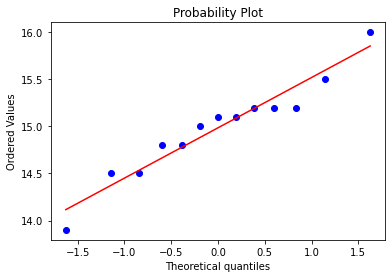

数据量为13的数据集正态性假设检验的结果 :

Omnibus         0.487527
Shapiro-Wilk    0.717017
dtype: float64


/Users/taylor/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [14]:
check_normality(甲车床, show_flag=True)

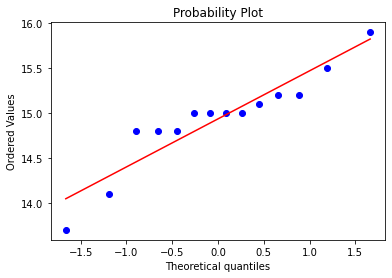

数据量为14的数据集正态性假设检验的结果 :

Omnibus         0.127615
Shapiro-Wilk    0.111537
dtype: float64


/Users/taylor/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [15]:
check_normality(乙车床, show_flag=True)

此时大样本检验出现警告，样本数太少，至少大于等于20。使用小样本检验计算出来的$p$为0.487527和0.127615，均大于$\alpha=0.01$，可以拒绝原假设，甲乙两个车床都不符合正态分布。


### 问题2&3
2. 甲/乙车床生产的滚珠直径的方差是否存在显著性差异？

3. 甲/乙车床生产的滚珠直径是否存在显著性差异？

两组样本的均值相等性检验，且组别间独立，先进行两组数据的方差齐性检验，再进行双样本t检验(Two Sample t-test)

检验的假设问题：
$$
H_0:\mu _甲=\mu _乙\leftrightarrow H_1:\mu _甲\ne \mu _乙\,
$$

[15.  14.5 15.2 15.5 14.8 15.1 15.2 14.8 13.9 16.  15.1 14.5 15.2] 
甲车床均值为： 14.984615384615383 
甲车床方差为： 0.494346738863373
[15.2 15.  14.8 15.2 15.  15.  14.8 15.1 14.8 15.  13.7 14.1 15.5 15.9] 
乙车床均值为： 14.935714285714285 
乙车床方差为： 0.514930151791959

先进行两组数据的方差齐性检验
在显著性水平0.05下，不能拒绝两组样本方差相等的假设(p=0.8656)，因此需要使用方差相等的t检验
------------------------------------
t检验（数据服从正态分布）p值：0.811
Mann-Whitney检验（数据不服从正态检验）p值：0.769
------------------------------------
两组样本均值的散点图可视化


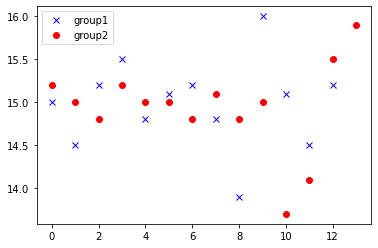

In [60]:
print(甲车床, '\n甲车床均值为：', 甲车床.mean(),'\n甲车床方差为：', 甲车床.std())
print(乙车床, '\n乙车床均值为：', 乙车床.mean(),'\n乙车床方差为：', 乙车床.std())
print()
unpaired_data(甲车床, 乙车床)

方差齐性检验的p值 0.8656 > 0.05，不能拒绝两组样本方差相等的假设，甲/乙车床生产的滚珠直径的方差不存在显著性差异。

t检验的p值 0.811 > 0.05，我们无法拒绝原假设，甲/乙车床生产的滚珠直径不存在显著性差异。

### 问题4

三台车床生产的滚珠直径是否存在显著性差异？在单因素方差分析中，本题的因素是什么？

因素是【车床】，车床所处的水平为【滚珠直径】，因素车床的因子水平个数为【3】。

# 思考：统计学假设检验中为什么P值越小，拒绝原假设的理由就越充分？

p值代表的是，认为H0假设为真的情况下，获得当前样本数据及更极端的数据的【概率】。

p的运用其实是：用小概率事件去验证原假设是否被推翻，我们想要的备择假设是否成立。因此在做研究时，一般把我们想验证的，作为备择假设H1，和它相反的作为原假设H0

假如你想验证男女身高均值不等，备择假设H1是：男女身高均值不等；而原假设H0是：男女身高均值相等。此时一般是通过p很小去拒绝H0以去证明H1是对的。

***当p大时，意味着当H0假设为真时，获得当前样本数据的概率很大。此时也获得了当前的样本数据，【大概率事件】发生了，所以我们无法拒绝原假设H0。***

***当p小时，意味着当H1假设为真时，获得当前样本数据的概率很小。此时也获得了当前的样本数据，【小概率事件】发生了，所以拒绝原假设H0。***


为什么p越小，拒绝H0的底气越足，越令人信服？

假设p=0.02，只有2%可能收到「男女身高均值不等」的样本，然而我们还收到了，这么小概率事件都发生了，那H0说【男女身高均值相等】肯定是有问题的。

那p小到多少，就说明可以拒绝了呢？0.5、0.1、0.06、0.01....好像小也是没有标准，其实也有标准，所以p和α（Significant Level=显著性水平），又有了关系。

在每个研究中，我们都可以设定α，他是固定的两条线（双尾、也可以是单尾），在这个线外侧，就是拒绝区域。当这个p<α的时候，意味着p是在某个α水平上显著了。如p=0.02，我们给两个α水平0.05、0.01（学术上常用），我们可以看到p=0.02<0.05，但是p=0.02>0.01，还用刚那个例子，回收「男女身高均值不等」的样本概率是0.02（已经很小了，），但因为我们设定了α水平（当p在此α水平的拒绝域时，我们才可以拒绝H0），因此我们想在更精准的去判断是否该拒绝H0，p=0.02时，那在显著性0.05的水平下，我们可以拒绝H0（p=0.02<0.05)，而在显著性0.01的水平下(p=0.02>0.01)，我们不能拒绝H0。

因此可以看出来，当我们设定的α越小时（如0.01，相比0.05），越不容易拒绝H0（因为只有p<α，才可以拒绝H0）。那如果此时如果被拒绝，那拒绝的“准确性”更高（犯错的概率更低，一类错误）。反过来，当α设定较高时（如0.1），那p很轻轻松松就容易小于0.1了，我们越容易拒绝H0，当然此时犯错概率也越大（10%）。这个犯错（一类错误）的概率就是α，0.1，就是有10%的可能犯错了，0.05，就是有5%的可能性犯错了；0.01就是有1%的可能性犯错了。当我们有了具体的小于α的p后，犯错误的概率就是p，如p=0.02，则有2%的可能性犯一类错误

# 方差分析的一些补充

[单因素方差分析(上）/ANOVA/什么是方差分析、方差分析的思路_哔哩哔哩_bilibili](https://www.bilibili.com/video/BV16U4y1e7DT?spm_id_from=333.880.my_history.page.click&vd_source=26bbc67352cfaee66337db8681be940d)

### CV

RSD/CV/变异系数/离散系数 =  标准差 / 均值 * 100%

反映单位均值上的离散程度，各观测值变异程度的一个统计量, 常用在两个总体均值不等的离散程度的比较上。

当进行两个或多个资料变异程度的比较时：
- 如果度量单位与平均数相同，可以直接利用标准差SD来比较。
- 如果单位和(或)平均数不同时，比较其变异程度就不能采用标准差，而需采用标准差与平均数的比值(相对值)来比较。

### 方差分析

方差分析(Analysis of Variance，简称ANOVA，是R.A.Fisher发明的，又称F检验)，用于多组样本均数差别的显著性检验。（通常组别≥3）

方差分析在做什么：N个分类（分类型变量），它们的某一特征值的平均数（连续性变量），是否有显著区别

组间波动越大，各组均值相等的可能性越小

若F统计量很大，认为各组之间的均值存在显著性差别，拒绝原假设

Eg: 不同分区视频的播放量是否相等？ 假设检验H0：都相等，备择假设H1：不全相等

单因素方差分析：one-way anova

### T检验与方差分析

T检验属于方差分析，是方差分析最基础的应用。

T检验也是做分组均值差异检验，那它和方差分析的区别，T检验是两组间均值差异比较，ANOVA是多组比较。